In [2]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

Estimación paramétrica

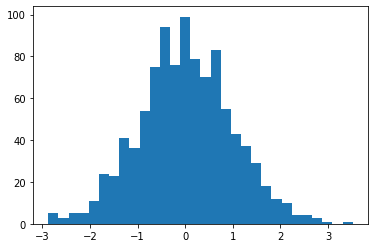

In [14]:
#Generador de datos
sample = normal(size = 1000)
pyplot.hist(sample, bins=30)
pyplot.show()

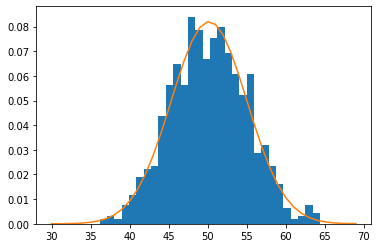

In [20]:
sample = normal(loc=50, scale=5, size=1000) #mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30,70)]
#densidad de probabilidad pdf
probabilidades = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins = 30, density=True)
pyplot.plot(values, probabilidades)
pyplot.show()

Estimación no paramétrica

kernel density estimation
-parámetro de suavizado smothing parameter
-función base, basis function

In [26]:
#No se forza parámetros de una distribución unica,
#sino se hace una combinación de distribuciones
#construir una distribución bi modal 
#hstack junta varios arreglos
from numpy import hstack
from sklearn.neighbors import KernelDensity

sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1,sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
#Modelo de ajuste con parámetro de suavizado de 2, para los datos 2
model.fit(sample)

KernelDensity(bandwidth=2)

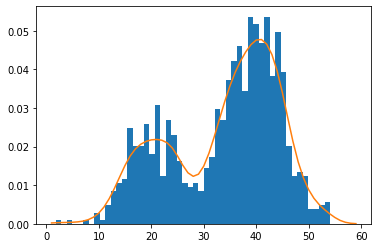

In [28]:
values = np.array([value for value in range(1,60)])
values = values.reshape((len(values),1))
probabilities = model.score_samples(values) #Probabilidad logarítmica
probabilities = np.exp(probabilities) # inversión de probabilidad

pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

In [29]:
#depende de los datos la distribución que se utilizará
